In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from scipy.stats import gaussian_kde

[*********************100%***********************]  1 of 1 completed


Mean : 0.9591694575211535 , Median : 1.3400115966796875 , Std : 7.871291454440875


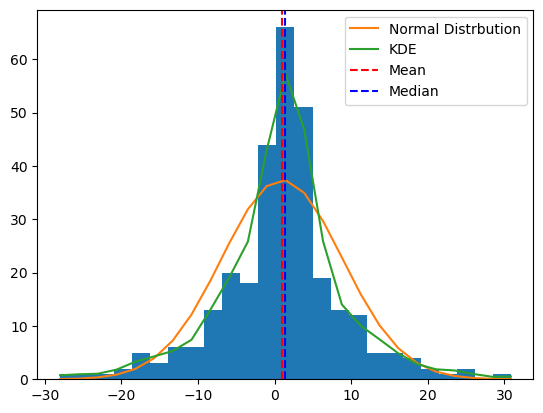

In [154]:
class Stock:
    def __init__(self , ticker , period , start , end):
        self.ticker = ticker
        self.period = period
        self.start = start
        self.end = end
        
    def returns_period(self):
        data = yf.download(self.ticker , start = self.start , end = self.end)
        list_changes_peroid = []
        for i in range(0 , data.shape[0] , self.period):
            try:
                list_changes_peroid.append((data['Close'].iloc[i +5] - data['Close'].iloc[i]).values)
            except IndexError :
                pass
        list_changes_peroid = np.array(list_changes_peroid)
        return list_changes_peroid
    
    def show_details(self , list_changes , bounds):
        print(f'Mean : {np.mean(list_changes)} , Median : {np.median(list_changes)} , Std : {np.std(list_changes)}')
        x = np.linspace(np.min(list_changes) , np.max(list_changes) , 25)
        bin_width = (x[1] - x[0])
        y = norm.pdf(x, np.mean(list_changes), np.std(list_changes)) * list_changes.shape[0] * bin_width
        # با کم و زیاد کردن مقدار bounds  میتوانیم یک ترید آف بین اورفیت شدن و آندرفیت بودن تابع برقرار کنیم
        kde = gaussian_kde(list_changes.flatten() , bw_method = bounds )
        y2 = kde(x)
        y_scaled = y2 * list_changes.shape[0] * (x[1] - x[0]) 
        plt.plot(x , y , label = 'Normal Distrbution')
        plt.plot(x , y_scaled , label="KDE")
        plt.axvline(np.mean(list_changes) , color = 'red' , label = 'Mean' , linestyle = '--')
        plt.axvline(np.median(list_changes) , color = 'blue' , label = 'Median' , linestyle = '--')
        
        plt.legend()
        
    def show_Loss_dist(self , changes):
        mean_loss = -1 * np.mean(changes)
        std_dev = np.std(changes)
        range_loss = np.arange(0,1,0.01)
        list2 = []
        for i in range_loss:
            list2.append(norm.ppf(i, loc=mean_loss, scale=std_dev))
        
        values = list2
        probabilities = 1 - range_loss
        probabilities = np.array(probabilities[1:])
        values = np.array(values[1:])

        pdf = -np.diff(probabilities) / np.diff(values) 

        x = (values[:-1] + values[1:]) / 2 
        
        return x , pdf
        

msft = Stock('MSFT' , 5 , '2018-01-01' , '2024-01-01')
changes = msft.returns_period()
plt.hist(changes , bins=25)
msft.show_details(changes , 0.25)

Text(0, 0.5, 'Density')

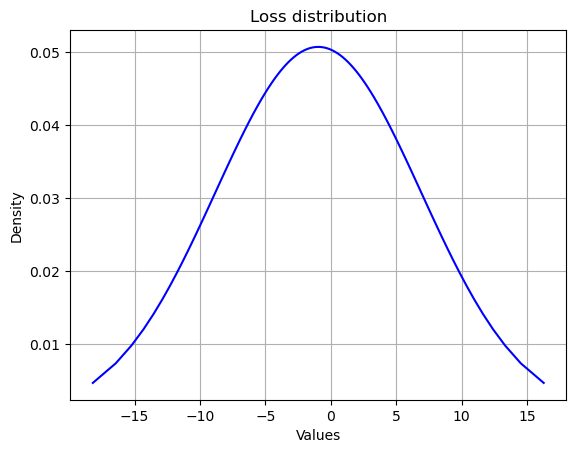

In [156]:
plt.plot(msft.show_Loss_dist(changes)[0] , msft.show_Loss_dist(changes)[1] , label='PDF', color='blue')
plt.grid(True)
plt.title('Loss distribution')
plt.xlabel('Values')
plt.ylabel('Density')

In [136]:
# Example for Var
mean_loss = -1 * np.mean(changes)
std_dev = np.std(changes)
confidence_level = 0.99

VaR = norm.ppf(confidence_level, loc=mean_loss, scale=std_dev)
print(f"VaR at {confidence_level*100}% confidence level: {VaR:.2f}")

VaR at 99.0% confidence level: 17.35
